# Jupyter
## Подготовка данных
----
#### 1. Загрузим датасет Титаник (`train_df` и `test_df`)

In [ ]:
import pandas as pd
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# просмотрим первые несколько строк
display(test_df.head())
display(train_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Конкатенируем их в один DataFrame `df`

In [ ]:
df = pd.concat([train_df, test_df], ignore_index=True)

# просмотрим первые и последние строки
display(df.head())
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Отсутствующие данные в колонке `Survived` запонились значением `Nan`

#### 3. Приведем столбцы к корректным типам данных

In [ ]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# просмотрим информацию по таблице
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 96.4+ KB
None


## Анализ таблицы
----

#### 1. Визуализируем базовую статистику таблицы и определим, в каком классе больше всего пассажиров

In [51]:
# базовая статистика
print(df.describe(include='all'))

# определим класс с наибольшим количеством пассажиров
# посчитаем количество пассажиров в каждом классе и выберем максимальный
most_passengers_class = df['Pclass'].value_counts().idxmax()
print(f'\nКласс с наибольшим количеством пассажиров: {most_passengers_class}')

        PassengerId  Survived  Pclass                  Name   Sex  \
count   1309.000000     891.0  1309.0                  1309  1309   
unique          NaN       2.0     3.0                  1307     2   
top             NaN       0.0     3.0  Connolly, Miss. Kate  male   
freq            NaN     549.0   709.0                     2   843   
mean     655.000000       NaN     NaN                   NaN   NaN   
std      378.020061       NaN     NaN                   NaN   NaN   
min        1.000000       NaN     NaN                   NaN   NaN   
25%      328.000000       NaN     NaN                   NaN   NaN   
50%      655.000000       NaN     NaN                   NaN   NaN   
75%      982.000000       NaN     NaN                   NaN   NaN   
max     1309.000000       NaN     NaN                   NaN   NaN   

                Age        SibSp        Parch    Ticket         Fare  \
count   1046.000000  1309.000000  1309.000000      1309  1308.000000   
unique          NaN        

#### **Ответ**

Класс с наибольшим количеством пассажиров: 3

#### 2. Сгруппируем таблицу в два уровня: класс и пол, по среднему значению возраста и определим, кто из возможных комбинаций самый юный, кто самый взрослый и насколько отличаются эти значения

In [ ]:
# сгруппируем по классу и полу и вычислим средний возраст
group = df.groupby(['Pclass', 'Sex'], observed=False)['Age'].mean()

# просмотрим таблицу
display(group)

# найдем самого юного и самого взрослого
youngest = group.idxmin()
oldest = group.idxmax()

# найдем разницу в возрасте
age_diff = group.max() - group.min()

print(f'Самая юная комбинация: класс {youngest[0]}, {youngest[1]} со средним возрастом {group.min():.1f}')
print(f'Самая взрослая комбинация: класс {oldest[0]}, {oldest[1]} со средним возрастом {group.max():.1f}')
print(f'Разница в возрасте: {age_diff:.1f}')

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

Самая юная комбинация: класс 3, female со средним возрастом 22.2
Самая взрослая комбинация: класс 1, male со средним возрастом 41.0
Разница в возрасте: 18.8


#### **Ответ**

Самая юная комбинация: класс 3, female со средним возрастом 22.2

Самая взрослая комбинация: класс 1, male со средним возрастом 41.0

Разница в возрасте: 18.8

#### 3. Отберем только выживших пассажиров с фамилией, начинающейся на “K”. Отсортируем их по убыванию стоимости билета и определим, кто заплатил больше и меньше всех

In [ ]:
# отберем выживших с фамилией на "K"
survivors = df[(df['Survived'] == 1) & (df['Name'].str.startswith('K'))]

# cортируем по убыванию стоимости билета
sorted_survivors = survivors.sort_values(by='Fare', ascending=False)

# просмотрим первые строки
display(sorted_survivors.head())

# найдем самый дорогой и дешевый билет
most_expensive = sorted_survivors.iloc[0]
cheapest = sorted_survivors.iloc[-1]

print(f'Самый дорогой билет: {most_expensive["Fare"]}, пассажир: {most_expensive["Name"]}')
print(f'Самый дешевый билет: {cheapest["Fare"]}, пассажир: {cheapest["Name"]}')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


Самый дорогой билет: 52.5542, пассажир: Kimball, Mr. Edwin Nelson Jr
Самый дешевый билет: 7.75, пассажир: Kelly, Miss. Mary


#### **Ответ**

Самый дорогой билет: 52.5542, пассажир: Kimball, Mr. Edwin Nelson Jr

Самый дешевый билет: 7.75, пассажир: Kelly, Miss. Mary

#### 4. Определим, какое максимальное количество родных было с выжившим пассажиром

In [54]:
# максимальное количество родных среди выживших пассажиров
df['Relatives'] = df['SibSp'] + df['Parch']
idx_max_relatives = df[df['Survived'] == 1]['Relatives'].idxmax()

print(f"У выжившего пассажира {df.iloc[idx_max_relatives]['Name']} "
      f"было максимальное количество родных, равное {df.iloc[idx_max_relatives]['Relatives']}")

У выжившего пассажира Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) было максимальное количество родных, равное 6


#### **Ответ**

У выжившего пассажира Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) было максимальное количество родных, равное 6

#### 5. Посчитаем среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана и найдем, во сколько раз они отличаются

In [ ]:
# считаем среднюю стоимость билетов
# выберем строки в которых указана кабина и посчитаем среднюю стоимость билетов
mean_with_cabins = df[df['Cabin'].notna()]['Fare'].mean()
# выберем строки в которых не указана кабина и посчитаем среднюю стоимость билетов
mean_without_cabins = df[df['Cabin'].isna()]['Fare'].mean()

print(f"Средняя стоимость билета пассажиров с каютой: {mean_with_cabins:.2f}")
print(f"Средняя стоимость билета пассажиров без каюты: {mean_without_cabins:.2f}")

# найдем отношение стоимостей
print(f"Стоимость отличается в {mean_with_cabins/mean_without_cabins:.2f} раз")

Средняя стоимость билета пассажиров с каютой: 81.93
Средняя стоимость билета пассажиров без каюты: 19.13
Стоимость отличается в 4.28 раз


#### **Ответ**

Средняя стоимость билета пассажиров с каютой: 81.93

Средняя стоимость билета пассажиров без каюты: 19.13

Стоимость отличается в 4.28 раз

## Визуализация
----

Построим по данным таблицы 10 различных графиков(шесть интерактивных, один 3D-график):
1. Scatter plot (интерактивный)
2. Linear plot (интерактивный)
3. Horizontal bar chart
4. Bar chart
5. Histogram (интерактивный)
6. Histogram
7. Box chart
8. Pie chart (интерактивный)
9. 3D Scatter Plot (интерактивный)
10. Sunburst (интерактивный)


#### 1. Scatter plot: интерактивный график распределения стоимости билета в зависимости от возраста с цветом по выживанию и формой маркера по классу

In [ ]:
# импортируем библиотеки
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# считаем стоимость билета по возрасту
fig = px.scatter(data_frame=df,
                 x='Age',
                 y='Fare',
                 color='Survived',
                 symbol='Pclass',
                 opacity=0.5,
                 title='Interactive Scatter plot: Fare by Age')
fig.show()

#### 2. Linear plot: интерактивный график зависимости количества выживших и погибших от возраста 

In [41]:
# считаем количество выживших и погибших по возрасту
age_survival = df.groupby('Age').agg(
    Survived_Count=('Survived', lambda x: (x == 1).sum()),
    Deceased_Count=('Survived', lambda x: (x == 0).sum())).reset_index()

fig = px.line(age_survival, x='Age', y=['Survived_Count', 'Deceased_Count'],
    title='Interactive Linear plot: Number of Survivors and Deceased by Age',
    labels={'value': 'Count'},
    markers=True)

fig.update_layout(legend_title_text='Status')
fig.show()

#### 3. Horizontal bar chart: график количества выживших и погибших по классам

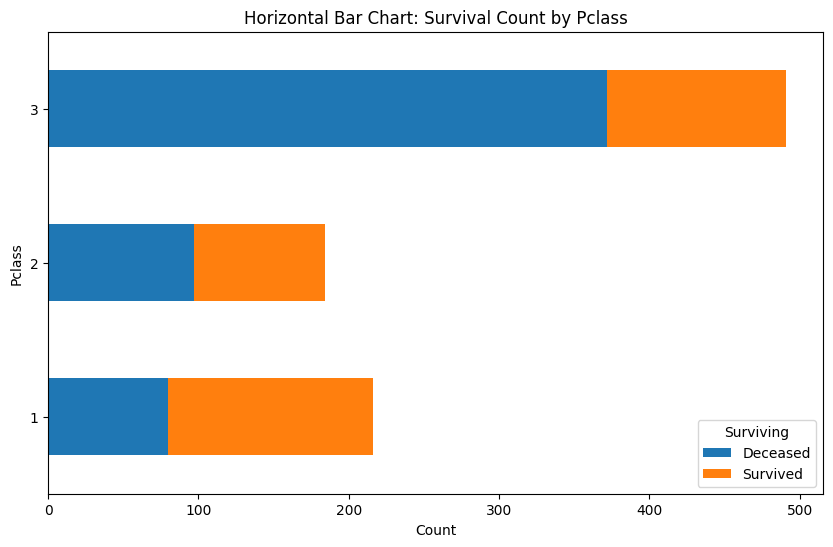

In [42]:
# считаем количество выживших и погибших по классам
pclass_survival = df.groupby(['Pclass', 'Survived'], observed=False).size().unstack()
pclass_survival.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Horizontal Bar Chart: Survival Count by Pclass')
plt.xlabel('Count')
plt.ylabel('Pclass')
plt.xticks(rotation=0)
plt.legend(title='Surviving', labels=['Deceased', 'Survived'])
plt.show()

#### 4. Bar chart: количество выживших и погибших по полу

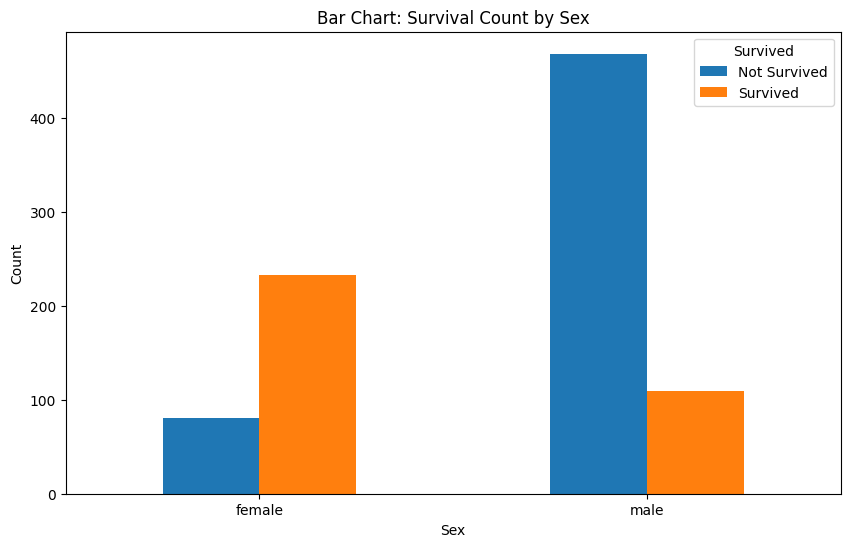

In [43]:
# считаем количество выживших и погибших по полу 
class_counts = df.groupby(['Sex', 'Survived'], observed=False).size().unstack()
class_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Bar Chart: Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

#### 5. Histogram: интерактивный график распределения стоимости билетов среди выживших и погибших пассажиров

In [ ]:
fig = px.histogram(data_frame=df,
                   x='Fare',
                   color='Survived',
                   title='Interactive Histogram: Fare Distribution of Passengers')
fig.show()

#### 6. Histogram: количетсво выживших и погибших в зависимости от числа родственников

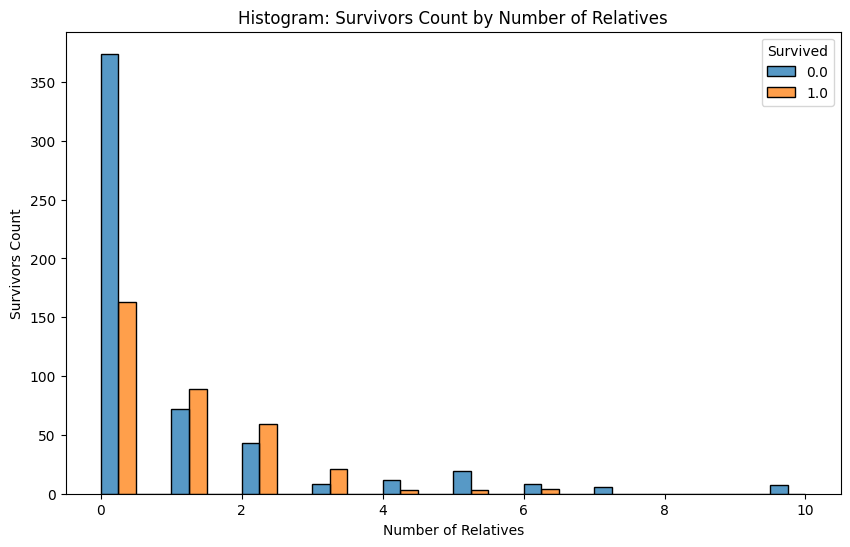

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Relatives', hue='Survived', multiple='dodge', bins=20)
plt.title('Histogram: Survivors Count by Number of Relatives')
plt.xlabel('Number of Relatives')
plt.ylabel('Survivors Count')
plt.show()

#### 7. Box chart: распределение стоимости билета по полу

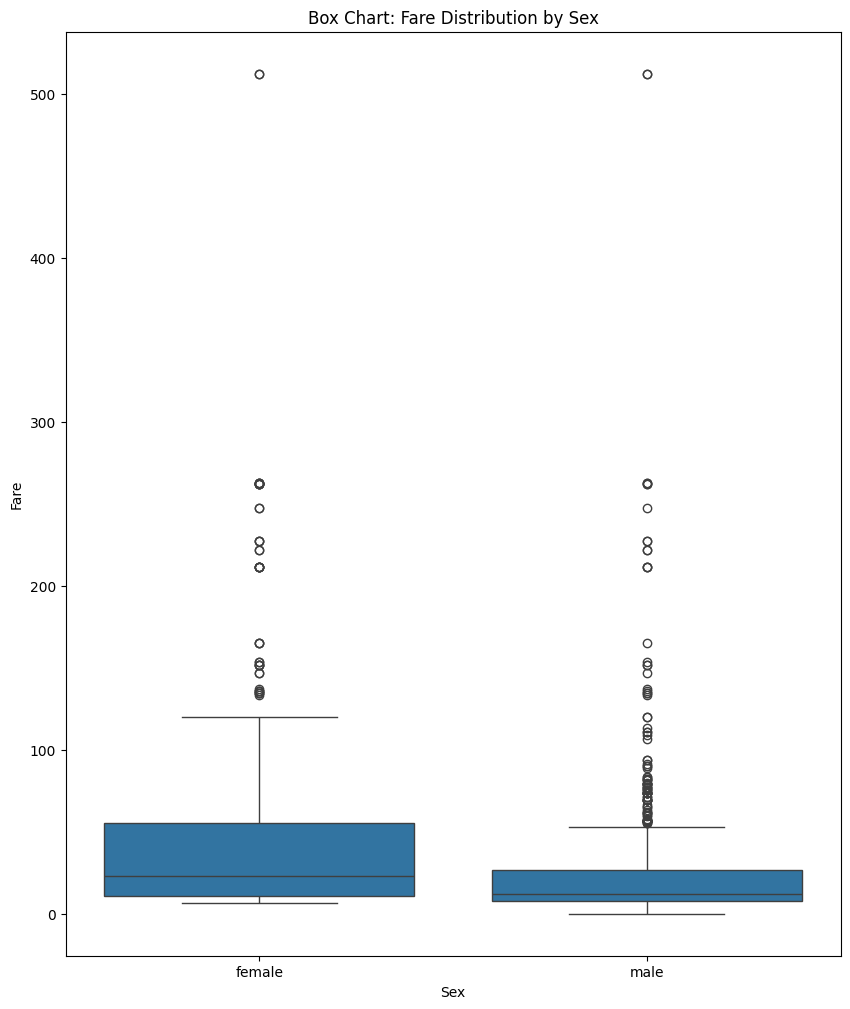

In [46]:
plt.figure(figsize=(10, 12))
sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Box Chart: Fare Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

#### 8. Pie chart: интерактивный график доли выживших и погибших

In [ ]:
# считаем количество выживших и погибших
count = df['Survived'].value_counts()
fig = px.pie(count,
             values=count.values,
             names=['Deceased', 'Survived'],
             title='Interactive Pie Chart: Survival Rate')
fig.show()

#### 9. 3D Scatter Plot: интерактивный график возраста, стоимости билета и класса с цветом по выживанию

In [48]:
fig = px.scatter_3d(df.dropna(subset=['Age', 'Fare']), 
                     x='Age', 
                     y='Fare', 
                     z='Pclass',
                     color='Survived',
                     title='Interactive 3D Scatter Plot: Age, Fare and Pclass',
                     labels={'x': 'Age', 'y': 'Fare', 'z': 'Pclass'},
                     )

fig.show()

#### 10. Sunburst: интерактивный график распределения по полу, классу и выживаемости с цветом по выживанию

In [49]:
fig = px.sunburst(df.dropna(subset=['Survived']), path=['Sex', 'Pclass', 'Survived'],
                  color='Survived',
                  title='Interactive Sunburst Chart: Sex, Pclass and Survival Distribution')
fig.show()

/home/elina/.local/lib/python3.10/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/elina/.local/lib/python3.10/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/elina/.local/lib/python3.10/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Дополнительно
----

Сделаем `Sankey Diagram` распределения мужчин и женщин по классам и по выживанию

In [ ]:
# импортируем библиотеку
import plotly.graph_objects as go

# убираем пропущенные данные
data = df.dropna(subset=['Survived'])

# cоздаем списки для sources, targets и values
labels = ['1st Class', '2nd Class', '3rd Class',
          'Male', 'Female', 
          'Deceased', 'Survived']

sources = [3, 4, 3, 4, 0, 0, 1, 1, 2, 2]
targets = [6, 6, 5, 5, 3, 4, 3, 4, 3, 4]
values = [
    data[(data['Survived'] == 1) & (data['Sex'] == 'male')].shape[0],
    data[(data['Survived'] == 1) & (data['Sex'] == 'female')].shape[0],
    
    data[(data['Survived'] == 0) & (data['Sex'] == 'male')].shape[0],
    data[(data['Survived'] == 0) & (data['Sex'] == 'female')].shape[0],

    data[(data['Pclass'] == 1) & (data['Sex'] == 'male')].shape[0],
    data[(data['Pclass'] == 1) & (data['Sex'] == 'female')].shape[0],

    data[(data['Pclass'] == 2) & (data['Sex'] == 'male')].shape[0],
    data[(data['Pclass'] == 2) & (data['Sex'] == 'female')].shape[0],
    
    data[(data['Pclass'] == 3) & (data['Sex'] == 'male')].shape[0],
    data[(data['Pclass'] == 3) & (data['Sex'] == 'female')].shape[0],
    
]

# создание графика
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Interactive Sankey Plot: Pclass, Sex and Survival",
                  font_size=15)
fig.show()